<a href="https://colab.research.google.com/github/SrishtiPatil/Data-Sprints/blob/main/Srishti_Phishing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Phishing attacks have been causing havoc for many years. They are increasingly becoming a concern all over the world. Being a data science enthusiast, you challenge yourself to solve this problem using the power of machine learning and data science. The objective was to develop a machine learning detector that would automatically detect phishing attacks. 

Evaluation Metric was: Accuracy = (TP+TN)/(TP+TN+FP+FN).

Link to the competition: https://dphi.tech/practice/challenge/41#problem


PS : Sadly, I forgot converting the label encoded data to labels and scored a zero. My focus on improving accuracy led to a major blunder. But as they say learn from your mistakes. I'll make sure this doesn't happen again.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler, normalize  
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

In [2]:
phishing_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/phishing_data/Training_set_label.csv" )
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/phishing_data/Testing_set_label.csv')

In [3]:
phishing_data.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,nb_underscore,nb_tilde,nb_percent,nb_slash,nb_star,nb_colon,nb_comma,nb_semicolumn,nb_dollar,nb_space,nb_www,nb_com,nb_dslash,http_in_path,https_token,ratio_digits_url,ratio_digits_host,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,random_domain,shortening_service,path_extension,nb_redirection,nb_external_redirection,...,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,ratio_nullHyperlinks,nb_extCSS,ratio_intRedirection,ratio_extRedirection,ratio_intErrors,ratio_extErrors,login_form,external_favicon,links_in_tags,submit_email,ratio_intMedia,ratio_extMedia,sfh,iframe,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.progarchives.com/album.asp?id=61737,46,20,zero,3,zero,0,1,0,0,1,0,0,0,3,0,1,0,0,0,0,1,0,0,0,1,0.108696,0.000000,0,0,0,0,0,3,0,0,0,0,0,0,...,7.5,3.750000,0,0,0,0,0,0,143,0.930070,0.069930,0,1,0,0.000000,0,0.0,0,1,73.913043,0,100.000000,0.000000,0,0,0,77.777778,0,0,0,1,one,0,627,6678,78526,0,0,5,phishing
1,http://signin.eday.co.uk.ws.edayisapi.dllsign....,128,120,0,10,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,0,0,0,0,1,0.054688,0.058333,0,0,0,0,0,3,0,0,0,0,0,0,...,10.7,0.000000,2,0,0,0,0,0,0,0.000000,0.000000,0,0,0,0.000000,0,0.0,0,0,0.000000,0,0.000000,0.000000,0,0,0,0.000000,0,0,1,1,zero,0,300,65,0,0,1,0,phishing
2,http://www.avevaconstruction.com/blesstool/ima...,52,25,0,3,0,0,0,0,0,0,0,0,0,4,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.000000,0,0,0,0,0,3,0,0,0,0,1,0,...,10.0,5.666667,0,0,0,0,0,0,3,1.000000,0.000000,0,0,0,0.000000,0,0.0,0,0,100.000000,0,0.000000,0.000000,0,0,0,0.000000,0,0,0,1,zero,0,119,1707,0,0,1,0,phishing
3,http://www.jp519.com/,21,13,0,2,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,1,0,0,0,1,0.142857,0.230769,0,0,0,0,0,2,0,1,0,0,0,0,...,4.0,0.000000,0,0,0,0,0,0,404,0.962871,0.037129,0,0,0,0.133333,0,0.0,0,0,100.000000,0,92.307692,7.692308,0,0,0,82.539683,0,0,0,1,one,0,130,1331,0,0,0,0,legitimate
4,https://www.velocidrone.com/,28,19,0,2,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,1,0,0,0,0,0.000000,0.000000,0,0,0,0,0,2,0,0,0,0,0,0,...,7.0,0.000000,0,0,0,0,0,0,57,0.684211,0.315789,0,3,0,0.000000,0,0.0,0,1,55.555556,0,50.000000,50.000000,0,0,0,81.081081,0,0,0,0,zero,0,164,1662,312044,0,0,4,legitimate


In [4]:
phishing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11481 entries, 0 to 11480
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11481 non-null  object 
 1   length_url                  11481 non-null  int64  
 2   length_hostname             11481 non-null  int64  
 3   ip                          11481 non-null  object 
 4   nb_dots                     11481 non-null  int64  
 5   nb_hyphens                  11481 non-null  object 
 6   nb_at                       11481 non-null  int64  
 7   nb_qm                       11481 non-null  int64  
 8   nb_and                      11481 non-null  int64  
 9   nb_or                       11481 non-null  int64  
 10  nb_eq                       11481 non-null  int64  
 11  nb_underscore               11481 non-null  int64  
 12  nb_tilde                    11481 non-null  int64  
 13  nb_percent                  114

In [5]:
phishing_data['status'].value_counts()

phishing      5741
legitimate    5740
Name: status, dtype: int64

**Label** **Encoding**

In [6]:
cat_columns=phishing_data.select_dtypes('object').columns
cat_columns

Index(['url', 'ip', 'nb_hyphens', 'domain_with_copyright', 'status'], dtype='object')

In [7]:
labelEncoder = LabelEncoder()
for i in cat_columns:
  if i == 'status':
    continue
  else:
      labelEncoder.fit(phishing_data[i])
      phishing_data[i] = labelEncoder.transform(phishing_data[i])
      labelEncoder.fit(test_data[i])
      test_data[i] = labelEncoder.transform(test_data[i])


In [8]:
phishing_data.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,nb_underscore,nb_tilde,nb_percent,nb_slash,nb_star,nb_colon,nb_comma,nb_semicolumn,nb_dollar,nb_space,nb_www,nb_com,nb_dslash,http_in_path,https_token,ratio_digits_url,ratio_digits_host,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,random_domain,shortening_service,path_extension,nb_redirection,nb_external_redirection,...,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,ratio_nullHyperlinks,nb_extCSS,ratio_intRedirection,ratio_extRedirection,ratio_intErrors,ratio_extErrors,login_form,external_favicon,links_in_tags,submit_email,ratio_intMedia,ratio_extMedia,sfh,iframe,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,4207,46,20,3,3,26,0,1,0,0,1,0,0,0,3,0,1,0,0,0,0,1,0,0,0,1,0.108696,0.000000,0,0,0,0,0,3,0,0,0,0,0,0,...,7.5,3.750000,0,0,0,0,0,0,143,0.930070,0.069930,0,1,0,0.000000,0,0.0,0,1,73.913043,0,100.000000,0.000000,0,0,0,77.777778,0,0,0,1,2,0,627,6678,78526,0,0,5,phishing
1,2165,128,120,0,10,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,0,0,0,0,1,0.054688,0.058333,0,0,0,0,0,3,0,0,0,0,0,0,...,10.7,0.000000,2,0,0,0,0,0,0,0.000000,0.000000,0,0,0,0.000000,0,0.0,0,0,0.000000,0,0.000000,0.000000,0,0,0,0.000000,0,0,1,1,3,0,300,65,0,0,1,0,phishing
2,2921,52,25,0,3,0,0,0,0,0,0,0,0,0,4,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.000000,0,0,0,0,0,3,0,0,0,0,1,0,...,10.0,5.666667,0,0,0,0,0,0,3,1.000000,0.000000,0,0,0,0.000000,0,0.0,0,0,100.000000,0,0.000000,0.000000,0,0,0,0.000000,0,0,0,1,3,0,119,1707,0,0,1,0,phishing
3,3729,21,13,0,2,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,1,0,0,0,1,0.142857,0.230769,0,0,0,0,0,2,0,1,0,0,0,0,...,4.0,0.000000,0,0,0,0,0,0,404,0.962871,0.037129,0,0,0,0.133333,0,0.0,0,0,100.000000,0,92.307692,7.692308,0,0,0,82.539683,0,0,0,1,2,0,130,1331,0,0,0,0,legitimate
4,7837,28,19,0,2,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,1,0,0,0,0,0.000000,0.000000,0,0,0,0,0,2,0,0,0,0,0,0,...,7.0,0.000000,0,0,0,0,0,0,57,0.684211,0.315789,0,3,0,0.000000,0,0.0,0,1,55.555556,0,50.000000,50.000000,0,0,0,81.081081,0,0,0,0,3,0,164,1662,312044,0,0,4,legitimate


**Data Split**

In [9]:
X = phishing_data.drop(['status'],axis=1)
Y = phishing_data[['status']]

**Dropping Unnecessary Features**

In [10]:
cor_matrix = X.corr()
cor_matrix.style.background_gradient()

/usr/local/lib/python3.6/dist-packages/pandas/io/formats/style.py:1126: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
/usr/local/lib/python3.6/dist-packages/pandas/io/formats/style.py:1127: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 100,stratify=Y)

**Feature Scaling**

In [12]:
scaler = StandardScaler() 
X_train_scaled = scaler.fit_transform(X_train)  
X_normalized = normalize(X_train_scaled) 
X_train = pd.DataFrame(X_normalized)

X_test_scaled = scaler.fit_transform(X_test)  
X_normalized = normalize(X_test_scaled) 
X_test = pd.DataFrame(X_normalized)


In [13]:
X_train.shape

(9184, 88)

**Logistic regression**

In [14]:
logreg = LogisticRegression().fit(X_train, Y_train)
Y_pred_logreg = logreg.predict(X_test)
print("Training set score: {:.3f}".format(logreg.score(X_train, Y_train)))
print("Test set score: {:.3f}".format(metrics.accuracy_score(Y_test, Y_pred_logreg)))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training set score: 0.945
Test set score: 0.945


**Linear SVC**

In [15]:
svc = SVC(kernel='linear',C=1000)
svc.fit(X_train,Y_train)
Y_pred_svc = svc.predict(X_test)
print("Training set score: {:.3f}".format(svc.score(X_train, Y_train)))
print("Test set score: {:.3f}".format(metrics.accuracy_score(Y_test, Y_pred_svc)))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training set score: 0.951
Test set score: 0.946


**KNN**

In [16]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train,Y_train)
Y_pred_knn = knn.predict(X_test)
print("Training set score: {:.3f}".format(knn.score(X_train, Y_train)))
print("Test set score: {:.3f}".format(metrics.accuracy_score(Y_test, Y_pred_knn)))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


Training set score: 0.981
Test set score: 0.945


**Decision Tree**

In [17]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,Y_train)
Y_pred_dtree = dtree.predict(X_test)
print("Training set score: {:.3f}".format(dtree.score(X_train, Y_train)))
print("Test set score: {:.3f}".format(metrics.accuracy_score(Y_test, Y_pred_dtree)))

Training set score: 1.000
Test set score: 0.904


**Cross Validation**

In [18]:
kfold = model_selection.KFold(n_splits=10, random_state=2000, shuffle=True)
CV_logreg = cross_val_score(estimator = logreg, X = X_train, y = Y_train.values.ravel(), cv = kfold,scoring='accuracy')
CV_logreg.mean()

0.9431647547182337

In [19]:
kfold = model_selection.KFold(n_splits=10, random_state=2000,shuffle=True)
CV_svc = cross_val_score(estimator = svc, X = X_train, y = Y_train.values.ravel(), cv = kfold,scoring='accuracy')
CV_svc.mean()

0.945232930555852

In [20]:
kfold = model_selection.KFold(n_splits=10, random_state=2000,shuffle=True)
CV_knn = cross_val_score(estimator = knn, X = X_train, y = Y_train.values.ravel(), cv = kfold,scoring='accuracy')
CV_knn.mean()

0.9398974920641695

In [21]:
kfold = model_selection.KFold(n_splits=10, random_state=2000,shuffle=True)
CV_dtree = cross_val_score(estimator = dtree, X = X_train, y = Y_train.values.ravel(), cv = kfold,scoring='accuracy')
CV_dtree.mean()

0.9569930136242624

**Confusion Matrix**

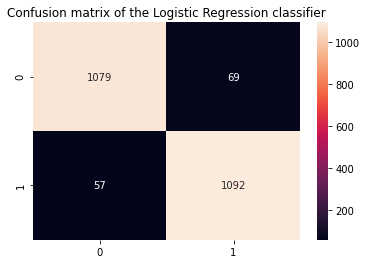

In [22]:
CM_logreg = confusion_matrix(Y_test, Y_pred_logreg)
plt.title('Confusion matrix of the Logistic Regression classifier')
sns.heatmap(CM_logreg,annot=True,fmt="d")
plt.show()

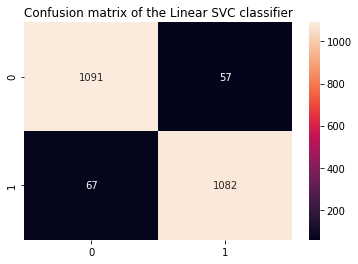

In [23]:
CM_SVC = confusion_matrix(Y_test, Y_pred_svc)
plt.title('Confusion matrix of the Linear SVC classifier')
sns.heatmap(CM_SVC,annot=True,fmt="d")
plt.show()

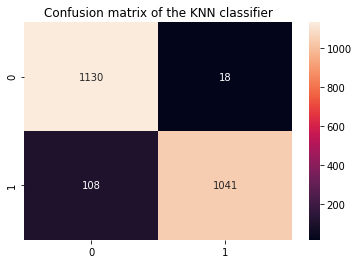

In [24]:
CM_knn = confusion_matrix(Y_test, Y_pred_knn)
plt.title('Confusion matrix of the KNN classifier')
sns.heatmap(CM_knn,annot=True,fmt="d")
plt.show()

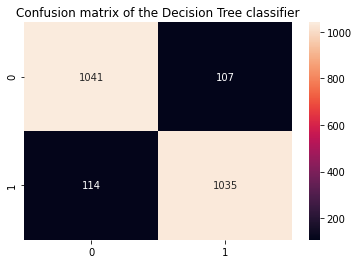

In [25]:
CM_dtree = confusion_matrix(Y_test, Y_pred_dtree)
plt.title('Confusion matrix of the Decision Tree classifier')
sns.heatmap(CM_dtree,annot=True,fmt="d")
plt.show()

**Results**

In [26]:
Results = pd.DataFrame(columns=['Algorithm','Train Accuracy','Test Accuracy','Cross-Validation'])
Results['Algorithm'] = ['Logistic Regression','Linear SVC','KNN','Decision Tree']
Results['Train Accuracy'] = [logreg.score(X_train, Y_train),svc.score(X_train, Y_train),knn.score(X_train, Y_train),dtree.score(X_train, Y_train)]
Results['Test Accuracy'] = [metrics.accuracy_score(Y_test, Y_pred_logreg),metrics.accuracy_score(Y_test, Y_pred_svc),metrics.accuracy_score(Y_test, Y_pred_knn),metrics.accuracy_score(Y_test, Y_pred_dtree)]
Results['Cross-Validation'] = [CV_logreg.mean(),CV_svc.mean(),CV_knn.mean(),CV_dtree.mean()]
Results

,Algorithm,Train Accuracy,Test Accuracy,Cross-Validation
0,Logistic Regression,0.945449,0.945146,0.943165
1,Linear SVC,0.951328,0.946017,0.945233
2,KNN,0.980836,0.945146,0.939897
3,Decision Tree,1.000000,0.903788,0.956993


**Applying On Test Data**

In [27]:
test_data.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,nb_underscore,nb_tilde,nb_percent,nb_slash,nb_star,nb_colon,nb_comma,nb_semicolumn,nb_dollar,nb_space,nb_www,nb_com,nb_dslash,http_in_path,https_token,ratio_digits_url,ratio_digits_host,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,random_domain,shortening_service,path_extension,nb_redirection,nb_external_redirection,...,avg_words_raw,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,ratio_nullHyperlinks,nb_extCSS,ratio_intRedirection,ratio_extRedirection,ratio_intErrors,ratio_extErrors,login_form,external_favicon,links_in_tags,submit_email,ratio_intMedia,ratio_extMedia,sfh,iframe,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
0,1064,91,36,0,2,1,0,0,0,0,0,3,0,0,4,0,1,0,0,0,0,0,0,0,0,1,0.087912,0.00000,0,0,0,0,0,2,1,0,0,0,1,0,...,9.125000,10.000000,8.600,0,0,0,0,0,0,13,1.000000,0.000000,0,0,0,0.000000,0,0.000000,0,0,100.000000,0,100.0,0.0,0,0,0,100.0,0,0,0,1,2,0,568,3815,0,0,1,2
1,1847,60,21,0,4,0,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.00000,0,0,0,0,0,3,0,0,0,0,1,0,...,7.000000,7.000000,7.000,0,0,0,0,0,0,57,0.842105,0.157895,0,0,0,0.111111,0,0.222222,1,0,33.333333,0,100.0,0.0,0,0,0,0.0,0,0,0,1,2,0,0,-1,18999,0,0,5
2,906,118,42,1,4,0,0,1,2,0,3,2,0,0,4,0,1,0,0,0,0,0,1,0,0,1,0.152542,0.00000,0,0,0,1,0,3,0,0,0,0,1,0,...,7.833333,8.750000,7.375,0,0,0,0,0,0,51,1.000000,0.000000,0,0,0,0.000000,0,0.000000,0,0,100.000000,0,100.0,0.0,0,0,0,100.0,0,0,0,1,2,0,25,3993,5707171,0,1,0
3,485,261,212,0,13,0,1,0,0,0,0,0,0,0,6,0,1,0,0,0,0,0,1,0,0,1,0.183908,0.20283,0,0,0,0,0,3,0,1,1,0,0,0,...,13.705882,16.416667,7.200,2,0,0,0,0,0,5,1.000000,0.000000,0,0,0,0.000000,0,0.000000,0,0,0.000000,0,0.0,0.0,0,0,0,100.0,0,0,0,1,2,0,3183,2660,0,0,1,4
4,2199,29,14,0,3,0,0,1,0,0,1,0,0,0,3,0,1,0,0,0,0,0,0,0,0,0,0.103448,0.00000,0,0,0,0,0,3,0,0,0,0,0,0,...,2.750000,3.500000,2.000,0,0,0,0,0,0,0,0.000000,0.000000,0,0,0,0.000000,0,0.000000,0,0,0.000000,0,0.0,0.0,0,0,0,0.0,0,0,0,1,3,0,2261,8756,84082,0,0,5


In [28]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3429 entries, 0 to 3428
Data columns (total 88 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         3429 non-null   int64  
 1   length_url                  3429 non-null   int64  
 2   length_hostname             3429 non-null   int64  
 3   ip                          3429 non-null   int64  
 4   nb_dots                     3429 non-null   int64  
 5   nb_hyphens                  3429 non-null   int64  
 6   nb_at                       3429 non-null   int64  
 7   nb_qm                       3429 non-null   int64  
 8   nb_and                      3429 non-null   int64  
 9   nb_or                       3429 non-null   int64  
 10  nb_eq                       3429 non-null   int64  
 11  nb_underscore               3429 non-null   int64  
 12  nb_tilde                    3429 non-null   int64  
 13  nb_percent                  3429 

**Scaling Features**

In [29]:
scaler = StandardScaler() 
X_act_train_scaled = scaler.fit_transform(test_data)  
X_act_normalized = normalize(X_act_train_scaled) 
X_act_test = pd.DataFrame(X_act_normalized)

In [30]:
X_act_test.shape

(3429, 88)

In [31]:
Y_pred = dtree.predict(X_act_test)

In [32]:
res = pd.DataFrame(Y_pred) 
res.columns = ["prediction"]
res.to_csv("Srishti_phishing.csv")